<a href="https://colab.research.google.com/github/mohamedhasan8403/phase-5/blob/main/Phase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

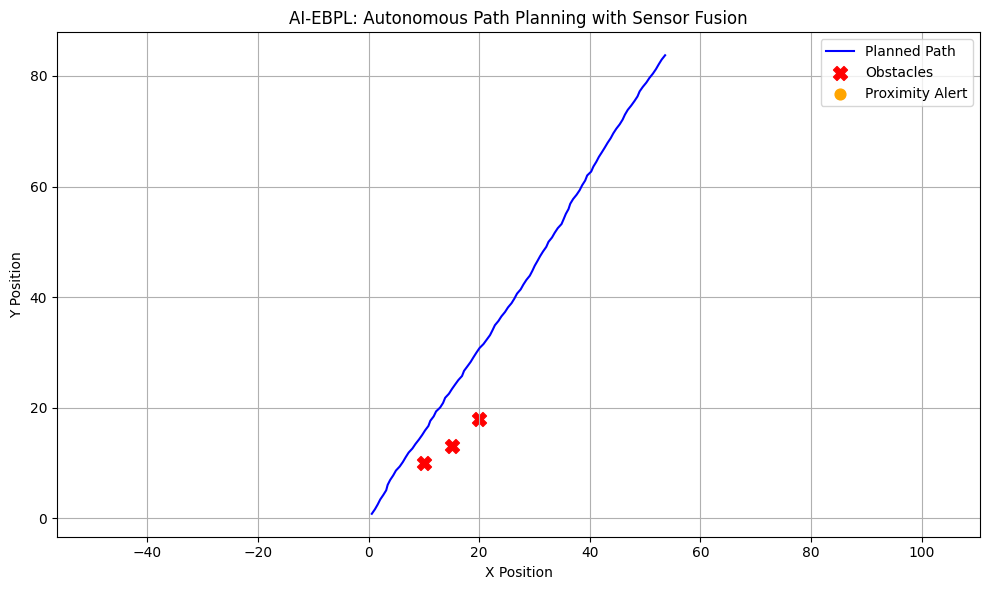

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
time_steps = 100
#Simulated sensor data (in meters)
lidar_data= np.random.normal(loc=10.0, scale=2.0, size=time_steps)
camera_data= np.random.normal(loc=10.2, scale=1.5, size=time_steps)
fused_data = (lidar_data + camera_data) / 2
x_pos = np.cumsum(np.cos(fused_data / 10))
y_pos=np.cumsum(np.sin(fused_data/ 10))
obstacles= np.array([[10, 10], [15, 13], [20, 18]])
def check_proximity (x, y, obstacles, threshold=2.5):
  for ox, oy in obstacles:
      dist= np.sqrt((x-ox)**2+ (y - oy)**2)
      if dist<threshold:
          return True
  return False
proximity_flags= [check_proximity (x, y, obstacles) for x, y in zip(x_pos, y_pos)]
data = pd.DataFrame({
  'Time': np.arange(time_steps),
  'Lidar_Distance': lidar_data,
  'Camera_Distance': camera_data,
  'Fused Distance': fused_data,
  'X': x_pos,
  'Y': y_pos,
  'Obstacle_Close': proximity_flags
})
plt.figure(figsize=(10, 6))
plt.plot(data['X'], data['Y'], label='Planned Path', color='blue')
plt.scatter(obstacles[:, 0], obstacles[:, 1], color='red', label='Obstacles', marker='X', s=100)
danger_points=data[data['Obstacle_Close']]
plt.scatter(danger_points['X'], danger_points['Y'], color='orange', label='Proximity Alert', s=60)
plt.title("AI-EBPL: Autonomous Path Planning with Sensor Fusion")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()